# Guia para hacer un modelo de ia del examen


## Ejercicio 1: Limpiar los datos



### QUITANDO FILAS Y COLUMNAS Y NORMALIZANDO DATOS

Para normalizar los datos hay que tener en cuenta que:
    
    Discretos/Enumerados/Cualitativos -> OneHotEncoding o Labled Encoder
        OneHotEncoding -> por defecto, si dudas usa este
        LabledEncoder -> si los valores tienen un orden

    Continuos -> StandardScaling, para normalizarlos y llevarlos a una escala comun



    -> solo deberia hacer falta copiar este codigo y cambiar las columnas en ATRIBUTOS, en final_data salen todos los datos sin el atributo solucion y en labeled_data el solucion

In [27]:
# imports
import glob as glob
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# ---------------------------- / LECTURA DE DATOS / ----------------------------------
data = pd.read_csv("dementia_dataset.csv") 



# --------------- / ATRIBUTOS / ---------------------
unnecessary_columns = [
    "Subject ID", 
    "MRI ID", 
    "Hand"          #
    ]
oneHot_columns = [
    "M/F"
    ]
standardScaling_columns = [
    "EDUC",
    "SES",
    "MMSE",
    "CDR",
    "eTIV",
    "nWBV",
    "ASF",
    "Visit",        #
    "MR Delay"
]
labeled_columns = [         # en este caso solo hay una columna que queramos, como es la solucion la codificamos por separado
    "Group"
    ]  
solucion = "Group"



# ---------------- / DROP /  -------------------
# pandas tiene la opcion de quitar columnas segun sus nombres
final_data = data.drop(columns=unnecessary_columns) 
# ----------------------------------------------------------------------



# ---------------- / OHE /  -------------------
encoder = OneHotEncoder(sparse_output=False) 
encoder_final = encoder.fit_transform(data[oneHot_columns])  
oneHot_df = pd.DataFrame(encoder_final, columns=encoder.get_feature_names_out(oneHot_columns))
# ----------------------------------------------------------------------



# ---------------- / SS /  -------------------
scaler = StandardScaler()
scaler_final = scaler.fit_transform(data[standardScaling_columns])
df_sc = pd.DataFrame(scaler_final, columns=standardScaling_columns, index=data.index)
# ----------------------------------------------------------------------



# ----------------- / LABELED ENCODER / -------------------------   
labler = LabelEncoder()
labeled_final = labler.fit_transform(data[labeled_columns])
df_lbl = pd.DataFrame(labeled_final, columns=labeled_columns, index=data.index)
# ----------------------------------------------------------------------



# junta el df sin las columnas del oneHot con las del oneHot en el eje de columnas
final_data = pd.concat([df_sc, oneHot_df], axis=1)
final_data = pd.concat([final_data, df_lbl], axis=1)

# quita los NaN
final_data = final_data.dropna(how="any")

# los separa
labeled_data = final_data[solucion]
final_data = final_data.drop(columns=[solucion]) 

# para guardarlas en un archivo (opcional)
#final_data.to_csv("./examen.csv", index=False)


c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Slices en Python (resumen rapido)

In [10]:
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
start = 0
stop = 2
step = 1

a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array

# ---------------------------------------------

a[start:stop:step] # start through not past stop, by step

# ---------------------------------------------

a[-1]    # last item in the array
a[-2:]   # last two items in the array
a[:-2]   # everything except the last two items

# ---------------------------------------------

a[::-1]    # all items in the array, reversed
a[1::-1]   # the first two items, reversed
a[:-3:-1]  # the last two items, reversed
a[-3::-1]  # everything except the last two items, reversed


[7, 6, 5, 4, 3, 2, 1, 0]

## Ejercicio 2: Representar los datos
(WIP)


C:\Users\Ines\AppData\Local\Temp\ipykernel_4212\4248669325.py:40: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


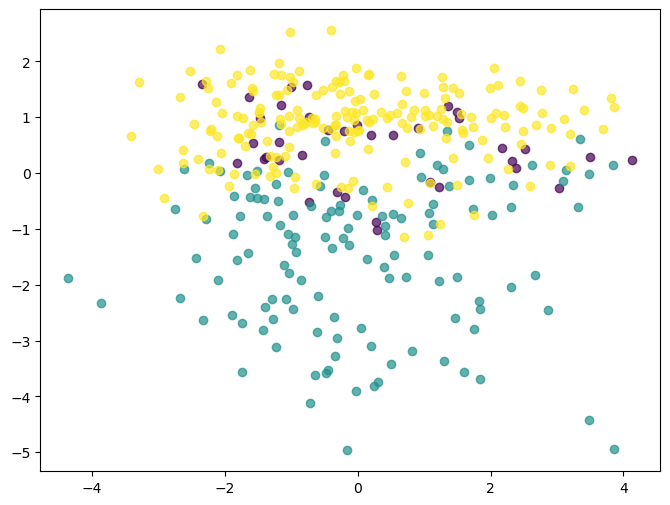

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# para estos hay que estar en el entorno, mejor abrir con anaconda
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# -------------------- / FILTRADO DE DATOS / -------------------
x = final_data
y = labeled_data

color = y  #codificando cada action como un color

# ------------------- / DISMINUCION DE DIMENSIONES / ------------------------ 
pca_comp = PCA(n_components=2)
x_pca = pca_comp.fit_transform(x)

clase = solucion
df_pca = pd.DataFrame({
    "c1": x_pca[:, 0],
    "c2": x_pca[:, 1],
    clase: y
})
grupos = sorted(df_pca[clase].unique())

# colores
colormap = plt.colormaps.get_cmap("viridis")
colors = colormap(np.linspace(0, 1, len(grupos)))


# ---------------------------- / PINTADO / ------------------------ 

# dibujado
plt.figure(figsize=(8,6))
for idx, grupo in enumerate(grupos):
    # para pintar cada posible solucion
    subset = df_pca[df_pca[clase] == grupo]
    plt.scatter(
        subset["c1"], 
        subset["c2"],
        label=f"Grupo {grupo}",
        c = colors[idx],
        alpha = 0.7
        )


plt.show()

## Ejercicio 3: MLP

In [19]:
import MLP_Complete as mlp
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X = final_data.values
y = labeled_data.values

# separa los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Tips:

Iteration      1: Cost   2.0169   
Iteration    101: Cost   1.6673   
Iteration    201: Cost   1.6602   
Iteration    301: Cost   1.1340   
Iteration    401: Cost   0.6116   
Iteration    501: Cost   0.5946   
Iteration    601: Cost   0.5769   
Iteration    701: Cost   0.5559   
Iteration    801: Cost   0.5336   
Iteration    901: Cost   0.5098   
Iteration   1001: Cost   0.4803   
Iteration   1101: Cost   0.4454   
Iteration   1201: Cost   0.4155   
Iteration   1301: Cost   0.3959   
Iteration   1401: Cost   0.4136   
Iteration   1501: Cost   0.3841   
Iteration   1601: Cost   0.3748   
Iteration   1701: Cost   0.3661   
Iteration   1801: Cost   0.3563   
Iteration   1901: Cost   0.3453   
Iteration   2000: Cost   0.3337   
-> Validacion Custom MLP: 85.39%


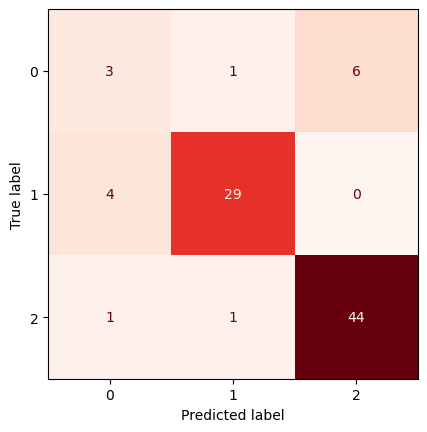

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# esto no lo entiendo AUN
y_train = y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train)

# valores que vamos tocando
LAYERS=(128, 64, 32)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=2000

# mlp
mlp_custom = mlp.MLP_Complete(inputLayer=X_train.shape[1], 
                              hiddenLayers=list(LAYERS), 
                              outputLayer=y_train_encoded.shape[1], 
                              seed=42)
mlp_custom.backpropagation(X_train, 
                        y_train_encoded, 
                        alpha=LR_INIT, 
                        lambda_=LAMBDA, 
                        numIte=ITERATIONS, 
                        verbose=100)

a, z = mlp_custom.feedforward(X_test)
y_pred = mlp_custom.predict(a[-1])
    


# resultados
acc_custom = accuracy_score(y_test, y_pred)
print(f"-> Validacion Custom MLP: {acc_custom * 100:.2f}%")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", colorbar=False)


## Ejercicio 4: Otros modelos

### MLP

In [21]:
from sklearn.neural_network import MLPClassifier

# codigo del mlp de sklearn

# valores que vamos tocando
LAYERS=(62, 70)
LAMBDA=0.001
LR_INIT=0.5
ITERATIONS=10000

mlp_sklearn = MLPClassifier(
        hidden_layer_sizes=LAYERS,
        activation='logistic',     
        solver='sgd',             
        max_iter=ITERATIONS,
        learning_rate="constant",
        learning_rate_init=LR_INIT,
        alpha=LAMBDA,             
        random_state=42,
        n_iter_no_change=100,
        verbose=True
    )

mlp_sklearn.fit(X_train, y_train)

y_pred_sklearn = mlp_sklearn.predict(X_test)

acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"-> Validacion SKLearn MLP: {acc_sklearn * 100:.2f}%")

c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.32073173
Iteration 2, loss = 3.96235383
Iteration 3, loss = 1.06117503
Iteration 4, loss = 0.95524426
Iteration 5, loss = 0.92094986
Iteration 6, loss = 0.91462271
Iteration 7, loss = 0.91362414
Iteration 8, loss = 0.90979727
Iteration 9, loss = 0.89987311
Iteration 10, loss = 0.88481297
Iteration 11, loss = 0.86890031
Iteration 12, loss = 0.85230531
Iteration 13, loss = 0.82924883
Iteration 14, loss = 0.79212821
Iteration 15, loss = 0.74353883
Iteration 16, loss = 0.68592702
Iteration 17, loss = 0.62014524
Iteration 18, loss = 0.55900670
Iteration 19, loss = 0.50809611
Iteration 20, loss = 0.46957015
Iteration 21, loss = 0.42800797
Iteration 22, loss = 0.39524042
Iteration 23, loss = 0.36952226
Iteration 24, loss = 0.34923137
Iteration 25, loss = 0.33342985
Iteration 26, loss = 0.32230274
Iteration 27, loss = 0.31337895
Iteration 28, loss = 0.30889045
Iteration 29, loss = 0.30471847
Iteration 30, loss = 0.30065784
Iteration 31, loss = 0.29839316
Iteration 32, los

### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

# codigo del decision tree

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"-> Validacion DT: {acc_dt * 100:.2f}%")

-> Validacion DT: 80.90%


### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# codigo del KNN

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"-> Validacion KNN: {acc_knn * 100:.2f}%")

-> Validacion KNN: 82.02%


c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier


# codigo del random forest

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"-> Validacion RF: {acc_rf * 100:.2f}%")

-> Validacion RF: 89.89%


c:\Users\Ines\anaconda3\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


## Ejercicio 5: Metricas


(WIP)

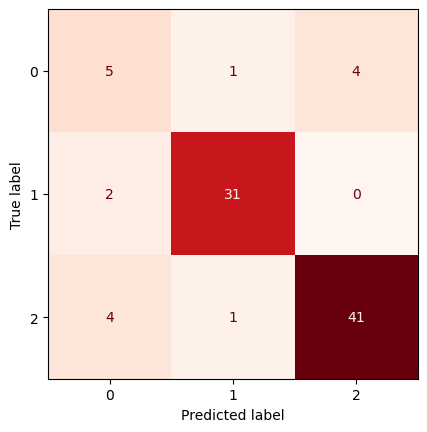

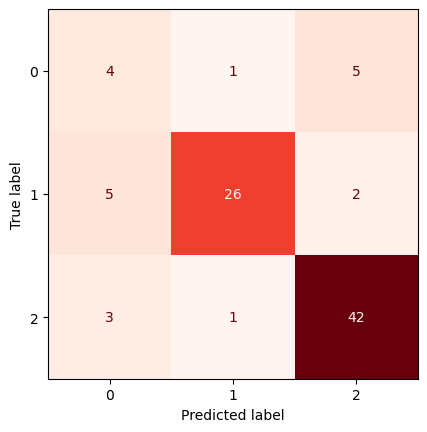

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay

# Matriz de confusion

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sklearn, cmap="Reds", colorbar=False)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Reds", colorbar=False)